# Surfs Up! - Analysis

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
from matplotlib import style
style.use('fivethirtyeight')

In [3]:
 # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
engine = create_engine('sqlite:///Resources/hawaii.sqlite')

In [5]:
Base = automap_base()
Base.prepare(engine, reflect=True)

Station = Base.classes.station
Measurement = Base.classes.measurement

In [6]:
session = Session(engine)

### Precipitation Analysis

In [7]:
end_date   = '2017-08-23'
start_date = (dt.datetime.strptime(end_date, '%Y-%m-%d') + dt.timedelta(days=-365)).strftime('%Y-%m-%d')

print('start date: {}'.format(start_date))
print('end date  : {}'.format(end_date))

start date: 2016-08-23
end date  : 2017-08-23


In [8]:
sql_results = session.query(Measurement.date, Measurement.prcp) \
                     .filter(Measurement.date >= start_date) \
                     .filter(Measurement.date <= end_date) \
                     .filter(Measurement.prcp != None) \
                     .order_by(Measurement.date.asc()).all()

In [9]:
len(sql_results)

2021

In [10]:
precipitation_df = pd.DataFrame(sql_results, columns=['date', 'prcp'])
precipitation_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,0.02
4,2016-08-23,1.79


In [11]:
precipitation_sum_df = pd.DataFrame(precipitation_df.groupby(['date']).sum())

In [12]:
precipitation_sum_df.head()

,prcp
date,
2016-08-23,2.71
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32


In [13]:
x_axis = precipitation_sum_df.index.values
y_axis = precipitation_sum_df['prcp']

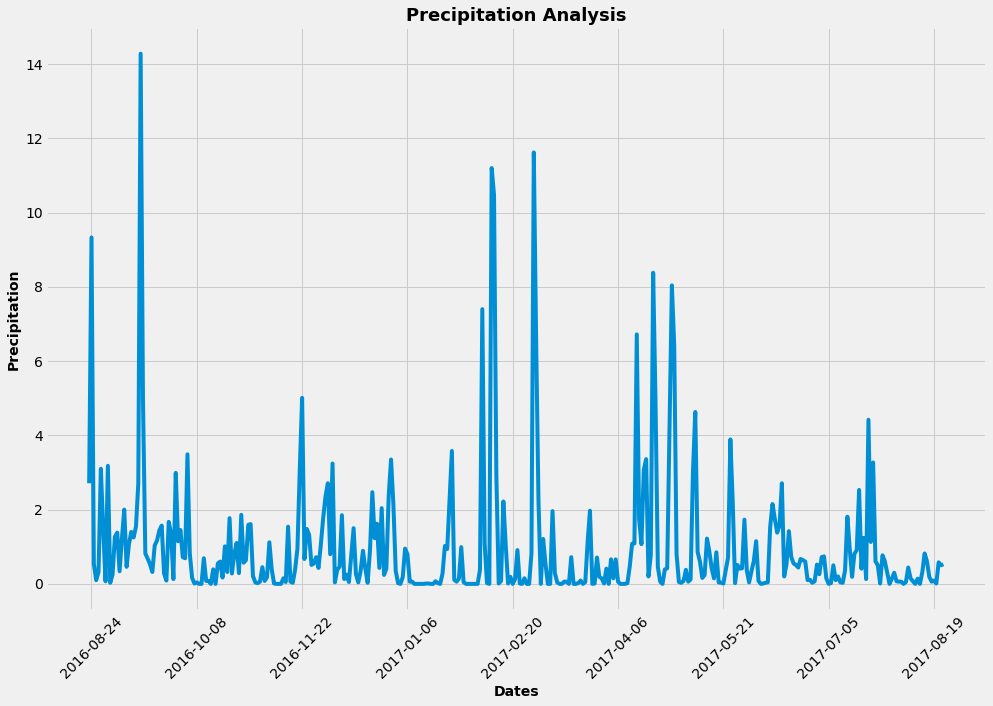

In [14]:
# Generate the Plot
plt.figure(figsize = (15,10))
plt.title("Precipitation Analysis",fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.ylabel("Precipitation", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Dates", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.xticks(np.arange(1,369,step=45))
plt.xticks(rotation=45)
plt.grid(True)

plt.plot(x_axis, y_axis)
plt.savefig("Resources/Precipitation.Analysis.png")
plt.show()

In [15]:
precipitation_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [16]:
precipitation_sum_df.describe()

,prcp
count,366.000000
mean,0.978907
std,1.776349
min,0.000000
25%,0.052500
50%,0.405000
75%,1.087500
max,14.280000


### Station Analysis

In [17]:
total_stations = session.query(Station.station).count()

In [18]:
print('Total Stations:  {}'.format(total_stations))

Total Stations:  9


In [19]:
sql_results = session.query(Measurement.station, Station.name, func.count(Measurement.tobs)) \
                     .filter(Measurement.station == Station.station) \
                     .group_by(Measurement.station) \
                     .order_by(func.count(Measurement.tobs) \
                     .desc()).statement

In [20]:
stations_df = pd.read_sql_query(sql_results, session.bind)
stations_df = stations_df.rename(columns = {'count_1':'count'})

In [21]:
stations_df

,station,name,count
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [22]:
station_max_observations = stations_df[stations_df['count'] == stations_df['count'].max()].station.values[0]
station_max_observations

'USC00519281'

In [23]:
sql_results = session.query(Measurement.tobs) \
                     .filter(Measurement.date >= start_date) \
                     .filter(Measurement.date <= end_date) \
                     .filter(Measurement.station == station_max_observations) \
                     .order_by(Measurement.date.asc()).statement

In [24]:
temp_observations_df = pd.read_sql_query(sql_results, session.bind)
temp_observations_df['tobs'].head()

0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
Name: tobs, dtype: float64

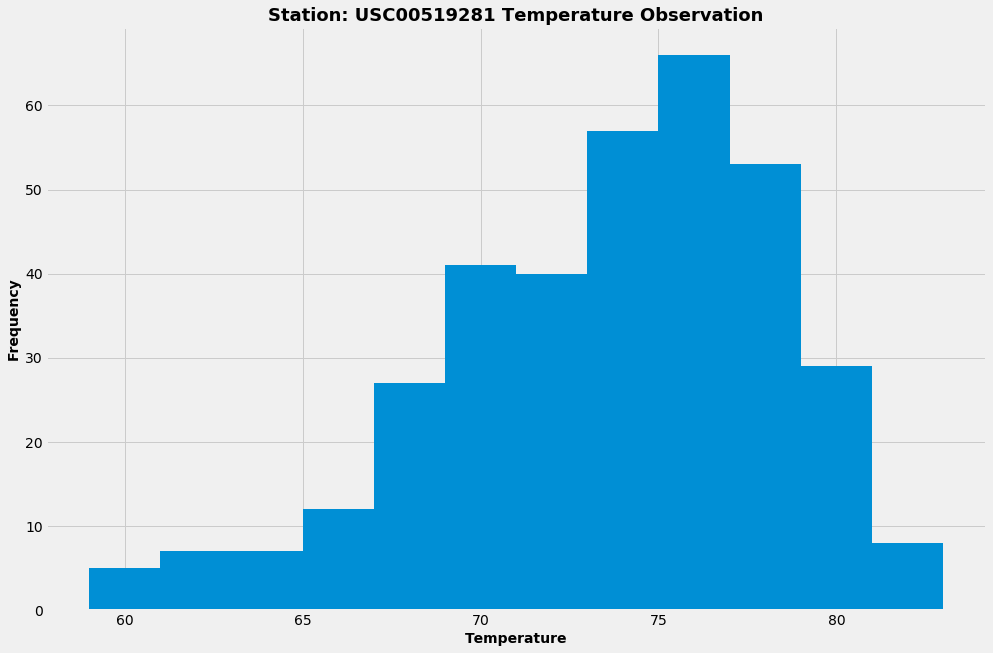

In [25]:
# Generate the Plot
plt.figure(figsize = (15,10))
plt.title("Station: "+station_max_observations+" Temperature Observation",fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.ylabel("Frequency", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Temperature", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.grid(True)

plt.hist(temp_observations_df['tobs'], bins=12)

plt.savefig("Resources/Station.Analysis.png")
plt.show()